## Mining the data using Initial Evaluations.

In [107]:
# Import the tools we need
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, read_json

In [108]:
# The web service that is the source of our data.
# This allows us to retrieve live data from the web service.
url = 'http://172.16.1.247:8000/ontario/api/initialevaluations?format=json'

In [109]:
# let's create a dataframe
df = pd.read_json(url)

In [110]:
# Let's see the first 5 rows of that data
df.head(5)

,bmi,gender,height,high_exercise,id,light_exercise,measured_blood_glucose,measured_blood_pressure,measured_hdl,measured_ldl,measured_total_cholesterol,measured_triglycerides,medium_exercise,participant,weight
0,28.2,f,63,3,155,5,96,113/75,24,92,134,45,3,1043,159.2
1,30.7,f,62,5,156,5,90,113/74,45,121,187,102,3,1044,168.0
2,28.1,f,59,4,157,4,96,133/91,70,135,235,45,6,1045,139.2
3,31.6,f,62,5,158,5,83,131/75,60,117,213,179,5,1046,173.2
4,28.6,f,63,6,159,5,89,140/72,43,172,243,45,5,1047,160.2


In [111]:
# Let's comput summary stats across the data frame.
description = df.describe()
description

,bmi,height,high_exercise,id,light_exercise,measured_blood_glucose,measured_hdl,measured_ldl,measured_total_cholesterol,measured_triglycerides,medium_exercise,participant,weight
count,146.000000,147.000000,138.000000,153.000000,143.000000,148.000000,148.000000,148.000000,148.000000,148.000000,139.000000,153.000000,147.000000
mean,30.172603,63.299320,4.217391,231.000000,4.153846,106.912162,48.763514,105.479730,192.506757,102.259122,4.028777,1087.313725,171.485714
std,5.197685,3.082018,1.909405,44.311398,1.194516,42.367188,15.168604,42.180769,39.250373,76.782924,1.793476,50.111910,33.452653
min,16.700000,57.000000,1.000000,155.000000,1.000000,72.000000,6.000000,6.000000,126.000000,45.000000,1.000000,1001.000000,93.400000
25%,26.725000,61.000000,2.000000,193.000000,3.000000,88.000000,38.000000,78.750000,162.000000,45.000000,2.000000,1047.000000,150.200000
50%,29.900000,63.000000,5.000000,231.000000,5.000000,93.000000,48.000000,103.000000,187.500000,45.000000,4.000000,1090.000000,166.600000
75%,33.150000,65.000000,6.000000,269.000000,5.000000,106.000000,58.000000,132.000000,219.000000,139.000000,6.000000,1130.000000,187.300000
max,46.200000,71.000000,6.000000,307.000000,6.000000,359.000000,93.000000,242.000000,320.000000,372.000000,6.000000,1171.000000,295.200000


In [112]:
# Let's explore the weights data column.
weights = jsondf['weight']
weights.head()

0    159.2
1    168.0
2    139.2
3    173.2
4    160.2
Name: weight, dtype: float64

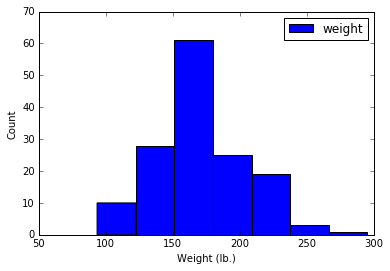

In [113]:
# We want to see the distribution of weights using a histogram
%matplotlib inline
weights_hist = weights.plot.hist(bins=7, legend=True)
weights_hist.set_xlabel('Weight (lb.)')
weights_hist.set_ylabel('Count')

In [114]:
# We want to look at biometrics data
biometrics = df.loc[:, ['measured_blood_glucose', 'measured_hdl', 'measured_ldl', 'measured_total_cholesterol', 'measured_triglycerides']]
biometrics.head(5)

,measured_blood_glucose,measured_hdl,measured_ldl,measured_total_cholesterol,measured_triglycerides
0,96,24,92,134,45
1,90,45,121,187,102
2,96,70,135,235,45
3,83,60,117,213,179
4,89,43,172,243,45


In [115]:
# Show the biometrics summary data
biometrics_summary_stats = biometrics.describe()
bms = biometrics_summary_stats.rename(columns={'measured_blood_glucose': 'bg',
                                        'measured_hdl': 'hdl',
                                        'measured_ldl': 'ldl',
                                        'measured_total_cholesterol': 'tc',
                                        'measured_triglycerides': 'tg'})
bms

,bg,hdl,ldl,tc,tg
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,106.912162,48.763514,105.479730,192.506757,102.259122
std,42.367188,15.168604,42.180769,39.250373,76.782924
min,72.000000,6.000000,6.000000,126.000000,45.000000
25%,88.000000,38.000000,78.750000,162.000000,45.000000
50%,93.000000,48.000000,103.000000,187.500000,45.000000
75%,106.000000,58.000000,132.000000,219.000000,139.000000
max,359.000000,93.000000,242.000000,320.000000,372.000000


In [116]:
# Now get the max, min and mean only.
bms_subset = bms.ix[['mean', 'min', 'max']]
bms_subset

,bg,hdl,ldl,tc,tg
mean,106.912162,48.763514,105.47973,192.506757,102.259122
min,72.000000,6.000000,6.00000,126.000000,45.000000
max,359.000000,93.000000,242.00000,320.000000,372.000000


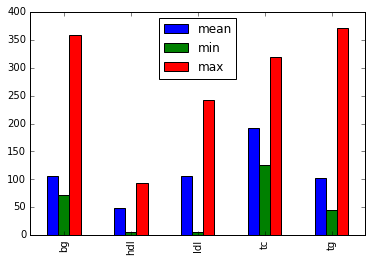

In [117]:
# Transpose the data and display a grouped bar graph.
bms_subset.transpose().plot.bar()